In [82]:
import	random
from	numpy.random	import	randint
from	numpy.random	import	rand
import	pandas	as	pd
import	datetime
import	numpy	as	np
import	matplotlib.pyplot	as	plt
import	mip
import	pycaret
from	pycaret.regression	import	*

In [83]:
df_0	=	pd.read_csv('data/공정 데이터 2022년 8월.csv')
df_0	=	df_0.drop(['idx',	'lineno',	'Order_date',	'cnt',	'day_night_type'],	axis=1)
df_1	=	pd.read_csv('data/프레스 1호-유압모터 전류데이터.csv',	index_col=0)
df_2	=	pd.read_csv('data/프레스 2호-유압모터 전류데이터.csv',	index_col=0)
df_3	=	pd.read_csv('data/프레스 3호-유압모터 전류데이터.csv',	index_col=0)
df_4	=	pd.read_csv('data/프레스 4호-유압모터 전류데이터.csv',	index_col=0)
df_5	=	pd.read_csv('data/로봇 1호-전류 데이터.csv',	index_col=0)
df_6	=	pd.read_csv('data/로봇 2호-전류 데이터.csv',	index_col=0)

In [84]:
df_1.head()
df_2.head()
df_3.head()
df_4.head()
df_5.head()
df_6.head()

,Time_s[s],RMS[A]
1,2022-07-17 0:01,1.624307
2,2022-07-17 0:06,1.618839
3,2022-07-17 0:13,1.619826
4,2022-07-17 0:24,1.610211
5,2022-07-17 0:30,1.624192


In [85]:
# 데이터 전처리
#	itemno	-->	index	
itemno2idx = dict()
idx2itemno = dict()
for	idx,	value	in	enumerate(df_0['itemno'].unique()):
    itemno2idx[value]	=	idx
    idx2itemno[idx]	=	value
df_0['itemno'] = df_0['itemno'].apply(lambda	x:	itemno2idx[x])
df_0.head()

,itemno,product_date,quantity
0,0,2022-08-10 7:57,5
1,0,2022-08-10 7:58,2
2,0,2022-08-10 7:59,3
3,0,2022-08-10 7:59,3
4,0,2022-08-10 8:00,3


In [86]:
# 컬럼 이름 수정
print('전처리 전')
for idx, value in enumerate([df_0, df_1, df_2, df_3, df_4, df_5, df_6]):
    columns = value.columns
    print(f'df_{idx} 열 이름: {columns}')

df_0 = df_0.rename(columns={'product_date': 'times', 'quantity': 'qty'})
df_1 = df_1.rename(columns={'Time_s[s]': 'times', 'RMS[A]': 'amp_1'})
df_2 = df_2.rename(columns={'Time_s[s]': 'times', 'Acceleration[g]': 'amp_2'})
df_3 = df_3.rename(columns={'Time_s[s]': 'times', 'RMS[A]': 'amp_3'})
df_4 = df_4.rename(columns={'Time_s[s]': 'times', 'RMS[A]': 'amp_4'})
df_5 = df_5.rename(columns={'Time_s[s]': 'times', 'RMS[A]': 'amp_5'})
df_6 = df_6.rename(columns={'Time_s[s]': 'times', 'RMS[A]': 'amp_6'})

print()
print('전처리 후')
for idx, value in enumerate([df_0, df_1, df_2, df_3, df_4, df_5, df_6]):
    columns = value.columns
    print(f'df_{idx} 열 이름: {columns}')


전처리 전
df_0 열 이름: Index(['itemno', 'product_date', 'quantity'], dtype='object')
df_1 열 이름: Index(['Time_s[s]', 'RMS[A]'], dtype='object')
df_2 열 이름: Index(['Time_s[s]', 'Acceleration[g]'], dtype='object')
df_3 열 이름: Index(['Time_s[s]', 'RMS[A]'], dtype='object')
df_4 열 이름: Index(['Time_s[s]', 'RMS[A]'], dtype='object')
df_5 열 이름: Index(['Time_s[s]', 'RMS[A]'], dtype='object')
df_6 열 이름: Index(['Time_s[s]', 'RMS[A]'], dtype='object')

전처리 후
df_0 열 이름: Index(['itemno', 'times', 'qty'], dtype='object')
df_1 열 이름: Index(['times', 'amp_1'], dtype='object')
df_2 열 이름: Index(['times', 'amp_2'], dtype='object')
df_3 열 이름: Index(['times', 'amp_3'], dtype='object')
df_4 열 이름: Index(['times', 'amp_4'], dtype='object')
df_5 열 이름: Index(['times', 'amp_5'], dtype='object')
df_6 열 이름: Index(['times', 'amp_6'], dtype='object')


In [87]:
# 완전성 품질지수
perc	=30
df_set	=	{'df_0':df_0, 'df_1':df_1, 'df_2':df_2, 'df_3':df_3, 'df_4':df_4, 'df_5':df_5, 'df_6':df_6}
for	df_name	in	list(df_set):
    print(f'DataFrame	name:	{df_name}')
    df	=	df_set[df_name]
    print('[step	1-1]')
    print(round(df.isnull().sum()/len(df)*100,	2))
    print('[step	1-2]')
    print(df.isnull().sum()/len(df)*100>perc)
    print('[step	2-1]')
    print(df.isnull().head())
    print('[step	2-2]')
    print(df.isnull().sum())
    print('[step	2-3]')
    cmpt_len	=	df.isnull().sum().sum()
    print(cmpt_len)
completeness	=	(1-cmpt_len/len(df))*100
print("결측치	=	%d개	\n완전성	품질지수	:	%.2f%%	"%(cmpt_len,completeness))

# 유일성 품질지수
unique_score	=0
df_set	=	{'df_0':df_0, 'df_1':df_1, 'df_2':df_2, 'df_3':df_3, 'df_4':df_4, 'df_5':df_5, 'df_6':df_6}
for df_name in	list(df_set):
    df	=df_set[df_name]
    check_unique = df.value_counts().reset_index()
    perc_check_unique = round((len(check_unique)-len(check_unique[check_unique[0]>1]))/len(check_unique)*100, 2)
    unique_score += perc_check_unique
    print(f'The percentage	of	uniqueness	for	{df_name} :	{perc_check_unique}')
uniqueness	= unique_score/len(list(df_set))
print(f'유일성	품질지수:	{round(uniqueness, 2)}%')

# 유효성 품질지수
valid_score_list	=	[]
for	df_name in list(df_set):
    df = df_set[df_name]
    if	df_name=='df_0':
        c_lb	=	df['qty']	>=0
        vald_df	=	c_lb	
        valid_score	=len(df)-len(vald_df)
        valid_score_list.append(valid_score)
        print(f'{df_name}	데이터	범위를	벗어난	데이터	수:	{valid_score}')
    else:   
        c_lb=df.iloc[:,1]	>=0
        vald_df	=c_lb	
        valid_score	=len(df)-len(vald_df)
        valid_score_list.append(valid_score)
        print(f'{df_name}	데이터	범위를	벗어난	데이터	수:	{valid_score}')
validity=100-sum(valid_score_list)/len(valid_score_list)
print(f'유효성	품질지수	:	{round(validity,	2)}%')

#일관성 품질지수
consis_score_list	=	[]
for	df_name	in	list(df_set):
    df = df_set[df_name]
    consis_score=100*sum(df['times'].apply(lambda	x:	isinstance(x,	datetime.datetime)))/len(df)
    consis_score_list.append(consis_score)
    print(f'{df_name}	날짜	타입	맞는	비율:	{consis_score}	%')
consistency=sum(consis_score_list)/len(consis_score_list)
print(f'일관성	품질지수	:	{round(consistency,	2)}%')	

# 정확성 품질지수
#	df_0과	df_1~df_6의	데이터	수집	기간이	다르므로	각각	다른	수집기간을	확인함
accuracy_score_list	=[]
#df_0	데이터	수집기간:	2022-08-10~2022-08-31
d0	=	pd.Timestamp(datetime.date(2022,8,10))		#date	객체1
d1	=	pd.Timestamp(datetime.date(2022,9,1))		#date	객체2
df_name	='df_0'
df	=	df_set[df_name]
con1	=	df['times']	>=	d0
con2	=	df['times']	<=	d1
vald_df	=	df[con1&con2]
accuracy_score	=len(vald_df)/len(df)	*100
accuracy_score_list.append(accuracy_score)
print(f'{df_name}의	정확성	품질지수:	{accuracy_score}	%')

#df_1~df_6	데이터	수집기간:	2022-07-17~2022-08-31
d0	=	pd.Timestamp(datetime.date(2022,7,17))		#date	객체1
d1	=	pd.Timestamp(datetime.date(2022,9,1))		#date	객체2
for	df_name	in	['df_1',	'df_2',	'df_3',	'df_4',	'df_5',	'df_6']:
    df	=	df_set[df_name]
    con1	=	df['times']	>=	d0
    con2	=	df['times']	<=	d1
    vald_df	=	df[con1&con2]
    accuracy_score	=len(vald_df)/len(df)	*100
    accuracy_score_list.append(accuracy_score)
    print(f'{df_name}의	정확성	품질지수:	{accuracy_score}	%')
accuracy	=	sum(accuracy_score_list)/len(accuracy_score_list)
print(f'정확성	품질지수	:	{round(accuracy,	2)}%')

# 무결성 품질지수
print('유일성	품질지수:	%d%%'	%	uniqueness)
print('유효성	품질지수:	%d%%'	%	validity)
print('일관성	품질지수:	%d%%'	%	consistency)
integrity	=	([uniqueness,	validity,	consistency].count(100)	/3)	*100
print('무결성	품질지수:	%d%%'	%	integrity)

print('완전성	가중치	품질지수:	%d%%'	%	(completeness	*0.2))
print('유일성	가중치	품질지수:	%d%%'	%	(uniqueness	*0.2))
print('유효성	가중치	품질지수:	%d%%'	%	(validity	*0.2))
print('일관성	가중치	품질지수:	%d%%'	%	(consistency	*0.15))
print('정확성	가중치	품질지수:	%d%%'	%	(accuracy	*0.15))
print('무결성	가중치	품질지수:	%d%%'	%	(integrity	*0.1))

data_quality	=	completeness	*0.2	+	uniqueness	*0.2	+	validity	*0.2	+	consistency	*0.15	+	accuracy	*0.15	+	integrity*0.1
print('데이터	품질지수:	%d%%'	%	data_quality)

DataFrame	name:	df_0
[step	1-1]
itemno    0.0
times     0.0
qty       0.0
dtype: float64
[step	1-2]
itemno    False
times     False
qty       False
dtype: bool
[step	2-1]
   itemno  times    qty
0   False  False  False
1   False  False  False
2   False  False  False
3   False  False  False
4   False  False  False
[step	2-2]
itemno    0
times     0
qty       0
dtype: int64
[step	2-3]
0
DataFrame	name:	df_1
[step	1-1]
times    0.0
amp_1    0.0
dtype: float64
[step	1-2]
times    False
amp_1    False
dtype: bool
[step	2-1]
   times  amp_1
1  False  False
2  False  False
3  False  False
4  False  False
5  False  False
[step	2-2]
times    0
amp_1    0
dtype: int64
[step	2-3]
0
DataFrame	name:	df_2
[step	1-1]
times    0.0
amp_2    0.0
dtype: float64
[step	1-2]
times    False
amp_2    False
dtype: bool
[step	2-1]
   times  amp_2
1  False  False
2  False  False
3  False  False
4  False  False
5  False  False
[step	2-2]
times    0
amp_2    0
dtype: int64
[step	2-3]
0
DataFrame	name:	df_3
[step	1

TypeError: '>=' not supported between instances of 'str' and 'Timestamp'

In [88]:
#data time 타입수정
print('전처리 전')
for idx, value in enumerate([df_0, df_1, df_2, df_3, df_4, df_5, df_6]):
    type=value['times'].dtypes
    print(f'df_{idx} times 열 type: {type}')
df_0['times']=pd.to_datetime(df_0['times'])
df_1['times']=pd.to_datetime(df_1['times'])
df_2['times']=pd.to_datetime(df_2['times'])
df_3['times']=pd.to_datetime(df_3['times'])
df_4['times']=pd.to_datetime(df_4['times'])
df_5['times']=pd.to_datetime(df_5['times'])
df_6['times']=pd.to_datetime(df_6['times'])
print()
print('전처리후')
for	idx,value	in	enumerate([df_0,	df_1,	df_2,	df_3,	df_4,	df_5,	df_6]):
    type=value['times'].dtypes
    print(f'df_{idx}times 열 type:{type}')

전처리 전
df_0 times 열 type: object
df_1 times 열 type: object
df_2 times 열 type: object
df_3 times 열 type: object
df_4 times 열 type: object
df_5 times 열 type: object
df_6 times 열 type: object

전처리후
df_0times 열 type:datetime64[ns]
df_1times 열 type:datetime64[ns]
df_2times 열 type:datetime64[ns]
df_3times 열 type:datetime64[ns]
df_4times 열 type:datetime64[ns]
df_5times 열 type:datetime64[ns]
df_6times 열 type:datetime64[ns]


In [89]:
print('전처리 전')
for idx, value in enumerate([df_0, df_1, df_2, df_3, df_4, df_5, df_6]):
    head = list(value['times'])[0]
    tail = list(value['times'])[-1]
    print(f'df_{idx}: (수집 시작 날짜) {head}, (수집 마지막 날짜) {tail}')

df_0 = df_0.query("times >= '2022-08-11 00:00:00' and times <= '2022-08-31 23:59:59'").reset_index(drop=True)
df_1 = df_1.query("times >= '2022-08-11 00:00:00' and times <= '2022-08-31 23:59:59'").reset_index(drop=True)
df_2 = df_2.query("times >= '2022-08-11 00:00:00' and times <= '2022-08-31 23:59:59'").reset_index(drop=True)
df_3 = df_3.query("times >= '2022-08-11 00:00:00' and times <= '2022-08-31 23:59:59'").reset_index(drop=True)
df_4 = df_4.query("times >= '2022-08-11 00:00:00' and times <= '2022-08-31 23:59:59'").reset_index(drop=True)
df_5 = df_5.query("times >= '2022-08-11 00:00:00' and times <= '2022-08-31 23:59:59'").reset_index(drop=True)
df_6 = df_6.query("times >= '2022-08-11 00:00:00' and times <= '2022-08-31 23:59:59'").reset_index(drop=True)

print()
print('전처리 후')
for idx, value in enumerate([df_0, df_1, df_2, df_3, df_4, df_5, df_6]):
    head = list(value['times'])[0]
    tail = list(value['times'])[-1]
    print(f'df_{idx}: (수집 시작 날짜) {head}, (수집 마지막 날짜) {tail}')

for idx, value in enumerate([df_0, df_1, df_2, df_3, df_4, df_5, df_6]):
    print(f'df_{idx}')
    print(value.head())


전처리 전
df_0: (수집 시작 날짜) 2022-08-10 07:57:00, (수집 마지막 날짜) 2022-08-31 23:52:00
df_1: (수집 시작 날짜) 2022-07-17 12:09:00, (수집 마지막 날짜) 2022-08-31 23:58:00
df_2: (수집 시작 날짜) 2022-07-17 12:10:00, (수집 마지막 날짜) 2022-08-31 23:58:00
df_3: (수집 시작 날짜) 2022-07-17 12:14:00, (수집 마지막 날짜) 2022-08-31 23:58:00
df_4: (수집 시작 날짜) 2022-07-17 12:15:00, (수집 마지막 날짜) 2022-08-31 23:59:00
df_5: (수집 시작 날짜) 2022-07-17 00:01:00, (수집 마지막 날짜) 2022-08-31 23:24:00
df_6: (수집 시작 날짜) 2022-07-17 00:01:00, (수집 마지막 날짜) 2022-08-31 23:52:00

전처리 후
df_0: (수집 시작 날짜) 2022-08-11 00:03:00, (수집 마지막 날짜) 2022-08-31 23:52:00
df_1: (수집 시작 날짜) 2022-08-11 00:00:00, (수집 마지막 날짜) 2022-08-31 23:58:00
df_2: (수집 시작 날짜) 2022-08-11 00:00:00, (수집 마지막 날짜) 2022-08-31 23:58:00
df_3: (수집 시작 날짜) 2022-08-11 00:00:00, (수집 마지막 날짜) 2022-08-31 23:58:00
df_4: (수집 시작 날짜) 2022-08-11 00:00:00, (수집 마지막 날짜) 2022-08-31 23:59:00
df_5: (수집 시작 날짜) 2022-08-11 00:03:00, (수집 마지막 날짜) 2022-08-31 23:24:00
df_6: (수집 시작 날짜) 2022-08-11 00:04:00, (수집 마지막 날짜) 2022-08-31 23:52:00
df_0
  

In [10]:
print('전처리	전')
for	idx,	value	in	enumerate([df_0,	df_1,	df_2,	df_3,	df_4,	df_5,	df_6]):
    print(f'df_{idx}')
    print(value.head())
df_0	=	df_0.set_index('times')
df_0	=	df_0.groupby([df_0.index.to_period('1T'),	'itemno']).sum().reset_index()
df_0['times']	=	df_0['times'].dt.to_timestamp('s').dt.strftime('%Y-%m-%d	%H:%M:%S')
df_0['times']	=	pd.to_datetime(df_0['times'])
df_0	=	df_0.set_index('times')
df_1	=	df_1.set_index('times').resample('1T').median()
df_2	=	df_2.set_index('times').resample('1T').median()
df_3	=	df_3.set_index('times').resample('1T').median()
df_4	=	df_4.set_index('times').resample('1T').median()
df_5	=	df_5.set_index('times').resample('1T').median()
df_6	=	df_6.set_index('times').resample('1T').median()
print('전처리	후')
for	idx,	value	in	enumerate([df_0,	df_1,	df_2,	df_3,	df_4,	df_5,	df_6]):
    print(f'df_{idx}')
    print(value.head())

전처리	전
df_0
   itemno               times  qty
0       9 2022-08-11 00:03:00    1
1       9 2022-08-11 00:03:00    1
2       9 2022-08-11 00:03:00    1
3       9 2022-08-11 00:04:00    1
4       9 2022-08-11 00:04:00    2
df_1
                times     amp_1
0 2022-08-11 00:00:00  5.920062
1 2022-08-11 00:03:00  5.924090
2 2022-08-11 00:07:00  5.884381
3 2022-08-11 00:11:00  5.896043
4 2022-08-11 00:14:00  5.941872
df_2
                times     amp_2
0 2022-08-11 00:00:00  5.413774
1 2022-08-11 00:02:00  5.438412
2 2022-08-11 00:03:00  5.409565
3 2022-08-11 00:06:00  5.309373
4 2022-08-11 00:09:00  5.340265
df_3
                times     amp_3
0 2022-08-11 00:00:00  0.004669
1 2022-08-11 00:02:00  0.004920
2 2022-08-11 00:05:00  0.004546
3 2022-08-11 00:06:00  0.004448
4 2022-08-11 00:08:00  0.004170
df_4
                times      amp_4
0 2022-08-11 00:00:00   0.004447
1 2022-08-11 00:02:00  14.618763
2 2022-08-11 00:03:00   0.010959
3 2022-08-11 00:05:00   0.004864
4 2022-08-11 00:07

In [11]:
df_sensor	=	df_1.join(df_2,	how='outer').join(df_3,	how='outer').join(df_4,	how='outer').join(df_5,	how='outer').join(df_6,	how='outer')
df=df_0.join(df_sensor,	how='left')
df.head()

,itemno,qty,amp_1,amp_2,amp_3,amp_4,amp_5,amp_6
times,,,,,,,,
2022-08-11 00:03:00,9,3,5.924090,5.409565,NaN,0.010959,4.3234,NaN
2022-08-11 00:04:00,9,5,NaN,NaN,NaN,NaN,NaN,19.140257
2022-08-11 00:05:00,9,9,NaN,NaN,0.004546,0.004864,NaN,NaN
2022-08-11 00:06:00,9,6,NaN,5.309373,0.004448,NaN,NaN,NaN
2022-08-11 00:07:00,9,9,5.884381,NaN,NaN,0.003873,NaN,NaN


In [12]:
df=df.fillna(0)
df.head()

,itemno,qty,amp_1,amp_2,amp_3,amp_4,amp_5,amp_6
times,,,,,,,,
2022-08-11 00:03:00,9,3,5.924090,5.409565,0.000000,0.010959,4.3234,0.000000
2022-08-11 00:04:00,9,5,0.000000,0.000000,0.000000,0.000000,0.0000,19.140257
2022-08-11 00:05:00,9,9,0.000000,0.000000,0.004546,0.004864,0.0000,0.000000
2022-08-11 00:06:00,9,6,0.000000,5.309373,0.004448,0.000000,0.0000,0.000000
2022-08-11 00:07:00,9,9,5.884381,0.000000,0.000000,0.003873,0.0000,0.000000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 16917 entries, 2022-08-11 00:03:00 to 2022-08-31 23:52:00
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   itemno  16917 non-null  int64  
 1   qty     16917 non-null  int64  
 2   amp_1   16917 non-null  float64
 3   amp_2   16917 non-null  float64
 4   amp_3   16917 non-null  float64
 5   amp_4   16917 non-null  float64
 6   amp_5   16917 non-null  float64
 7   amp_6   16917 non-null  float64
dtypes: float64(6), int64(2)
memory usage: 1.2 MB


In [14]:
df.describe()

,itemno,qty,amp_1,amp_2,amp_3,amp_4,amp_5,amp_6
count,16917.000000,16917.000000,16917.000000,16917.000000,16917.000000,16917.000000,16917.000000,16917.000000
mean,11.446474,7.189100,3.037748,2.728354,0.009387,0.016748,1.339684,1.030189
std,8.818024,2.235593,2.967980,2.707263,0.375557,0.547618,4.204100,3.629776
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,10.000000,8.000000,5.837677,5.267213,0.000000,0.000000,0.000000,0.000000
75%,14.000000,9.000000,5.919141,5.410431,0.004447,0.004286,0.000000,0.000000
max,35.000000,11.000000,6.544678,5.930254,42.140625,39.300453,27.099874,26.726574


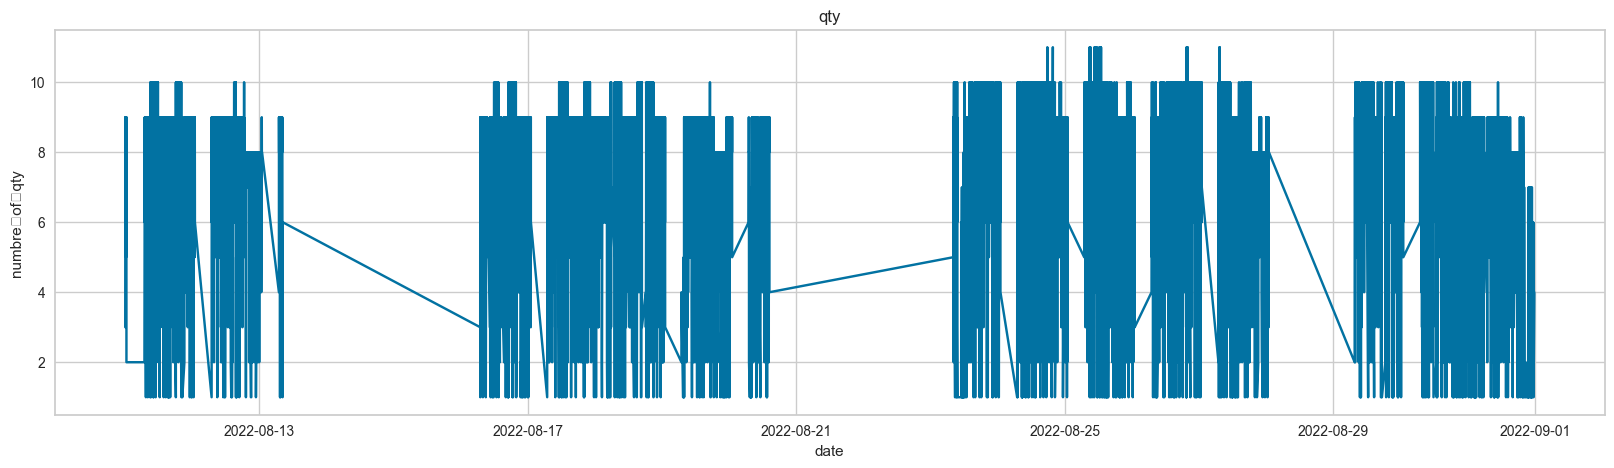

In [15]:
plt.figure(figsize=(20,	5))
plt.xlabel('date')
plt.ylabel('numbre	of	qty')
plt.title('qty')
plt.plot(df['qty'])
plt.show()

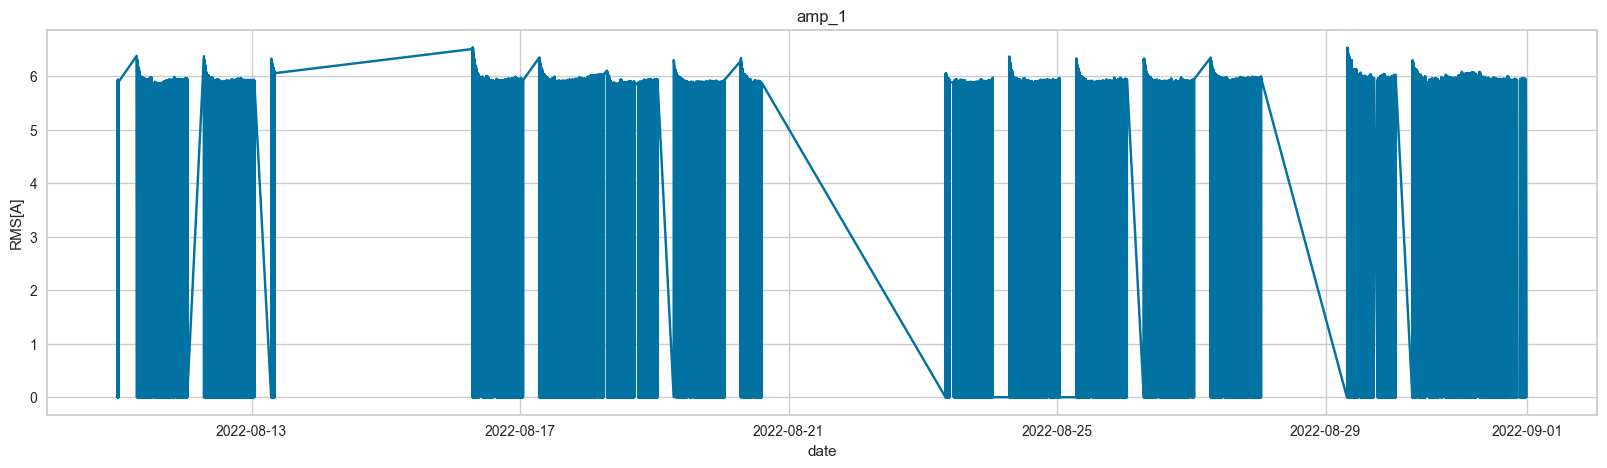

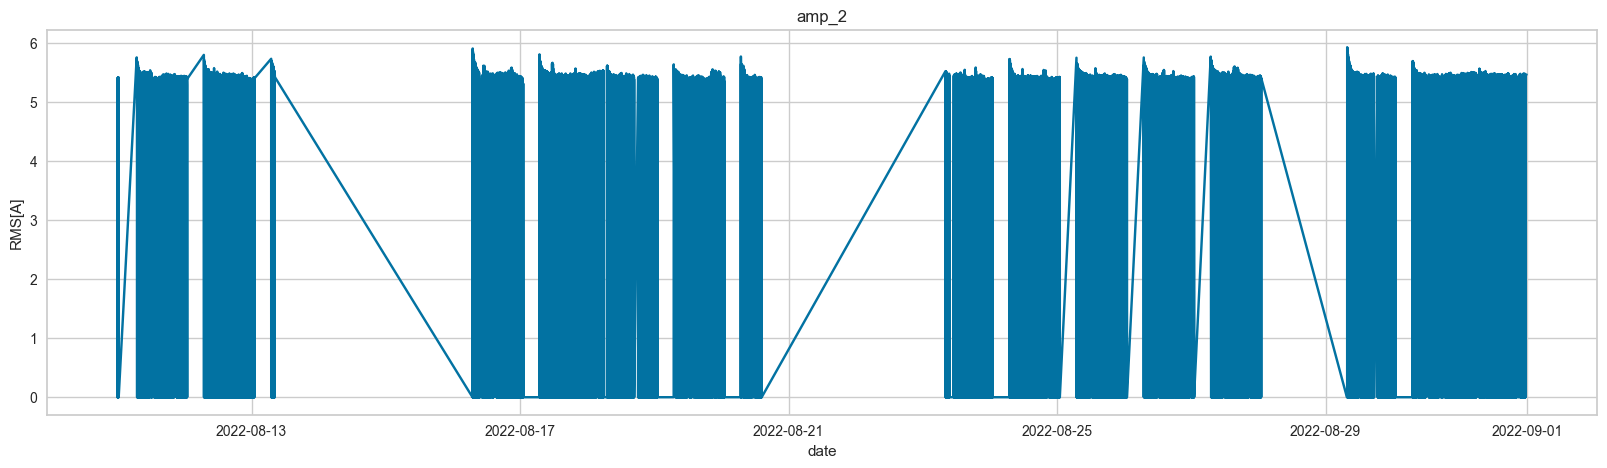

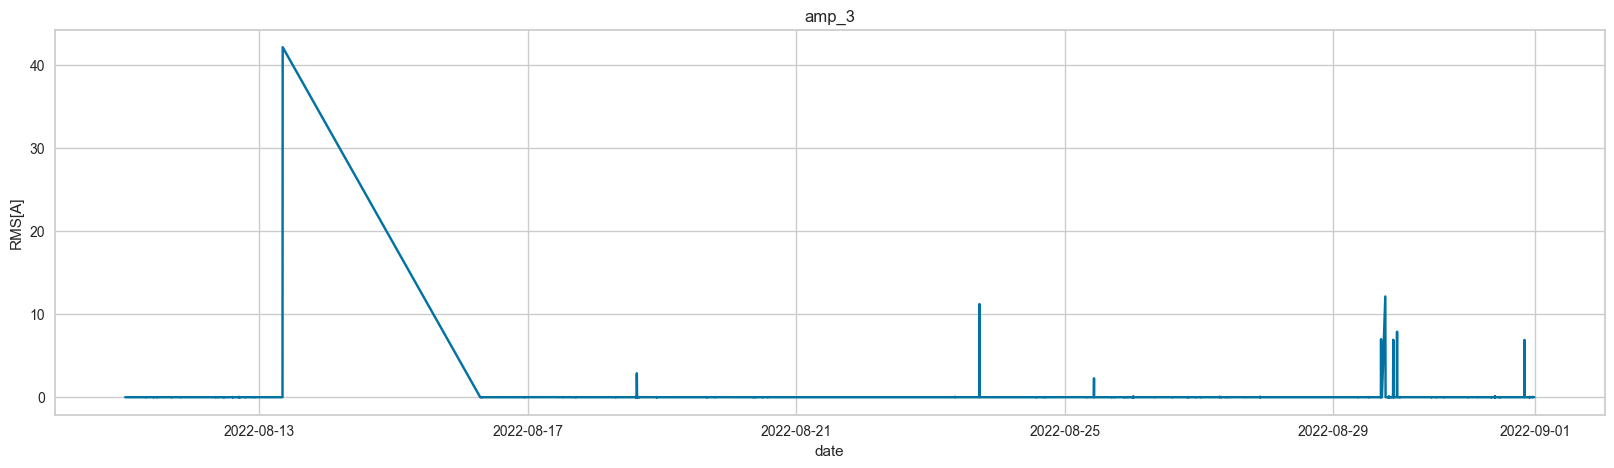

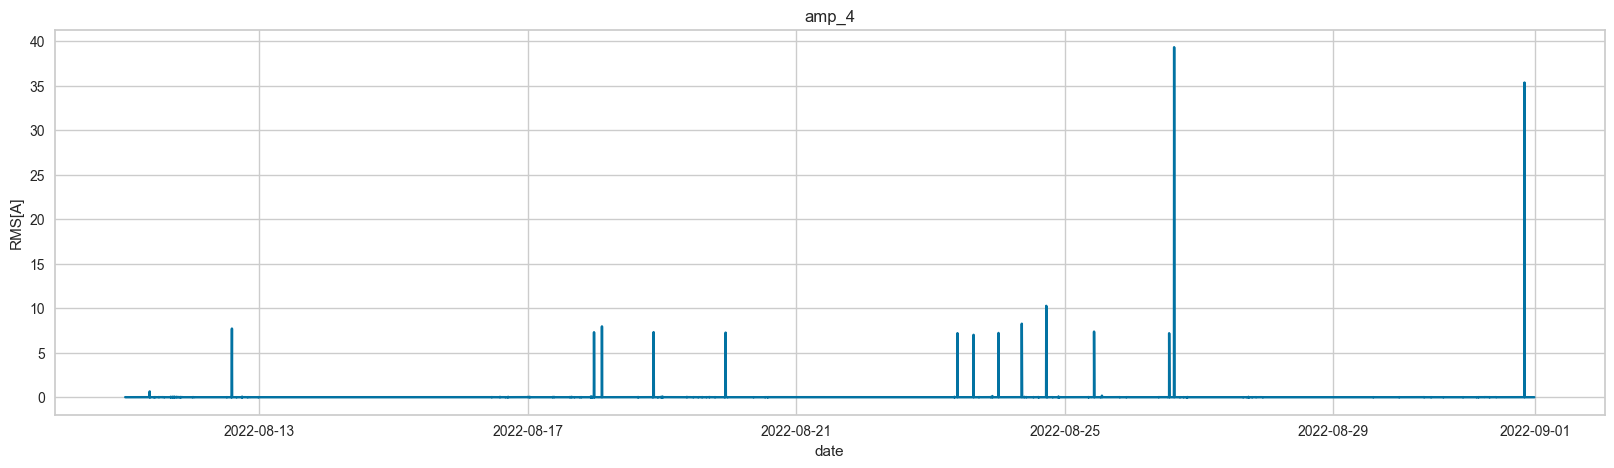

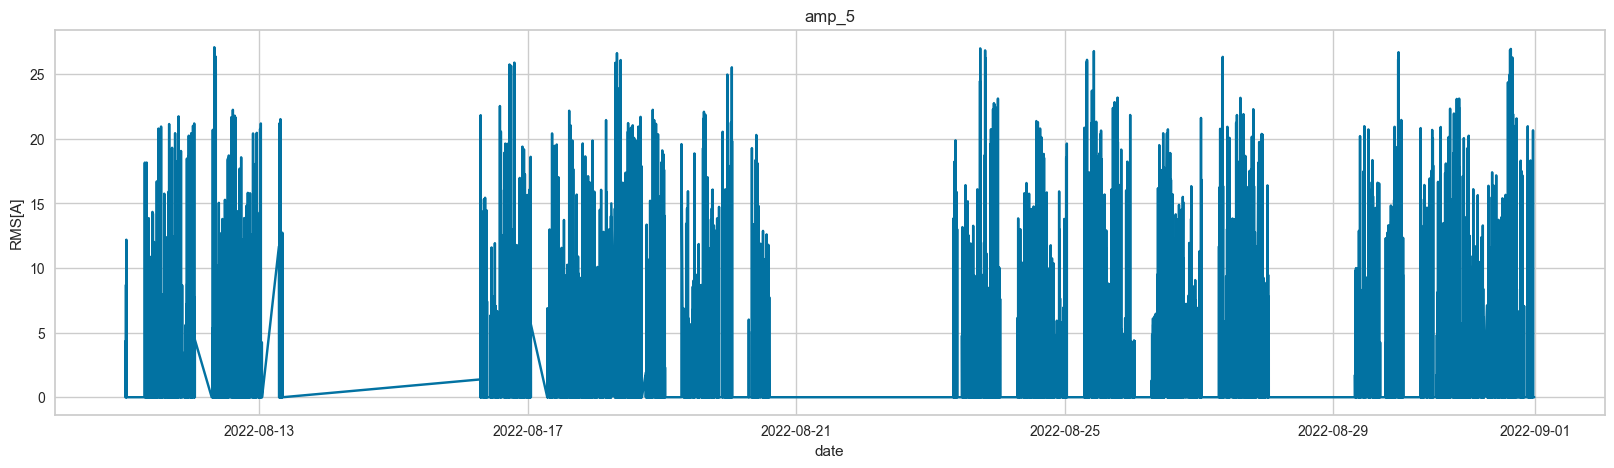

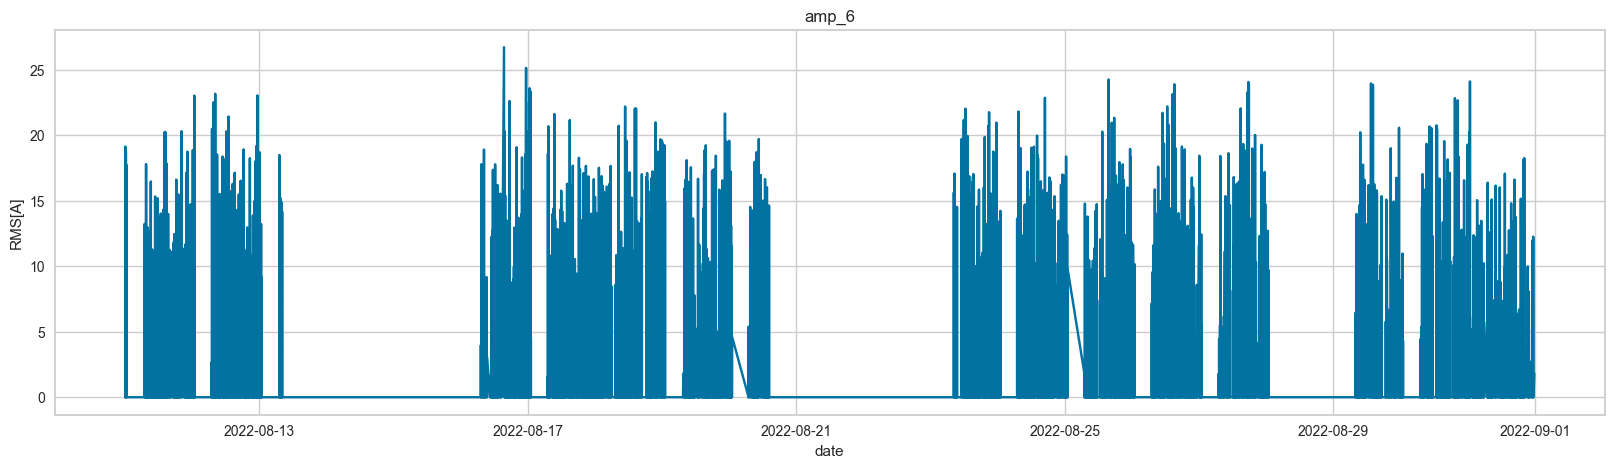

In [16]:
amp_list	=	['amp_1',	'amp_2',	'amp_3',	'amp_4',	'amp_5',	'amp_6']
for	amp	in	amp_list:
    plt.figure(figsize=(20,	5))
    plt.xlabel('date')
    plt.ylabel('RMS[A]')
    plt.title(amp)
    plt.plot(df[amp])
    plt.show()

In [46]:
amp_list = ['amp_1', 'amp_2', 'amp_3', 'amp_4', 'amp_5', 'amp_6']

for amp in amp_list:
    reg1 = setup(
        df[['itemno', 'qty', amp]], 
        target = amp,
        categorical_features = ['itemno'],
        numeric_features = ['qty'],
        session_id = 123, 
        log_experiment = True, 
        experiment_name = f'{amp}_best_model',
        html = False,  # silent 인수는 최신 버전에서 지원되지 않으므로 html로 대체
        index = False
    )
    best_model = compare_models(
        #include = ['lr', 'rf', 'ada'],
        include = ['rf', 'xgboost', 'svm'],
        sort = 'MAE'
    )
    tuned_best_model = tune_model(best_model)
    save_model(tuned_best_model, model_name = f'{amp}_best_model')


                    Description             Value
0                    Session id               123
1                        Target             amp_1
2                   Target type        Regression
3           Original data shape        (25533, 3)
4        Transformed data shape        (25533, 3)
5   Transformed train set shape        (17873, 3)
6    Transformed test set shape         (7660, 3)
7              Numeric features                 1
8          Categorical features                 1
9                    Preprocess              True
10              Imputation type            simple
11           Numeric imputation              mean
12       Categorical imputation              mode
13     Maximum one-hot encoding                25
14              Encoding method              None
15               Fold Generator             KFold
16                  Fold Number                10
17                     CPU Jobs                -1
18                      Use GPU             False


2024/06/13 22:15:36 WARNING mlflow.utils.requirements_utils: Detected one or more mismatches between the model's dependencies and the current Python environment:
 - mlflow (current: 2.0.1, required: mlflow==2.12.2)
To fix the mismatches, call `mlflow.pyfunc.get_model_dependencies(model_uri)` to fetch the model's environment and install dependencies using the resulting environment file.
2024/06/13 22:15:37 WARNING mlflow.utils.requirements_utils: Detected one or more mismatches between the model's dependencies and the current Python environment:
 - mlflow (current: 2.0.1, required: mlflow==2.12.2)
To fix the mismatches, call `mlflow.pyfunc.get_model_dependencies(model_uri)` to fetch the model's environment and install dependencies using the resulting environment file.
2024/06/13 22:15:37 WARNING mlflow.utils.requirements_utils: Detected one or more mismatches between the model's dependencies and the current Python environment:
 - mlflow (current: 2.0.1, required: mlflow==2.12.2)
To fix 

                             Model     MAE      MSE    RMSE      R2   RMSLE  \
svm      Support Vector Regression  2.8982  14.5813  3.8184 -0.6576  1.2865   
xgboost  Extreme Gradient Boosting  2.9418   8.9211  2.9868 -0.0141  1.0492   
rf         Random Forest Regressor  2.9421   8.9159  2.9859 -0.0135  1.0489   

           MAPE  TT (Sec)  
svm      0.1206     1.391  
xgboost  0.4831     0.248  
rf       0.4831     0.495  


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


2024/06/13 22:18:45 WARNING mlflow.utils.requirements_utils: Detected one or more mismatches between the model's dependencies and the current Python environment:
 - mlflow (current: 2.0.1, required: mlflow==2.12.2)
To fix the mismatches, call `mlflow.pyfunc.get_model_dependencies(model_uri)` to fetch the model's environment and install dependencies using the resulting environment file.


         MAE     MSE    RMSE      R2   RMSLE    MAPE
Fold                                                
0     2.9476  9.4376  3.0721 -0.0723  1.1127  0.3841
1     2.9730  9.6116  3.1003 -0.0915  1.1258  0.3828
2     2.9409  9.4676  3.0770 -0.0761  1.1287  0.3640
3     2.9269  9.3548  3.0586 -0.0644  1.1138  0.3731
4     2.9317  9.3042  3.0503 -0.0607  1.0919  0.3971
5     2.9227  9.3702  3.0611 -0.0659  1.1179  0.3634
6     2.9423  9.3975  3.0655 -0.0681  1.1200  0.3745
7     2.9365  9.4537  3.0747 -0.0735  1.1196  0.3683
8     2.9504  9.5007  3.0823 -0.0798  1.1228  0.3708
9     2.9342  9.3751  3.0619 -0.0644  1.1171  0.3739
Mean  2.9406  9.4273  3.0704 -0.0717  1.1170  0.3752
Std   0.0136  0.0831  0.0135  0.0087  0.0096  0.0098
Transformation Pipeline and Model Successfully Saved
                    Description             Value
0                    Session id               123
1                        Target             amp_2
2                   Target type        Regression
3    

2024/06/13 22:19:17 WARNING mlflow.utils.requirements_utils: Detected one or more mismatches between the model's dependencies and the current Python environment:
 - mlflow (current: 2.0.1, required: mlflow==2.12.2)
To fix the mismatches, call `mlflow.pyfunc.get_model_dependencies(model_uri)` to fetch the model's environment and install dependencies using the resulting environment file.
2024/06/13 22:19:17 WARNING mlflow.utils.requirements_utils: Detected one or more mismatches between the model's dependencies and the current Python environment:
 - mlflow (current: 2.0.1, required: mlflow==2.12.2)
To fix the mismatches, call `mlflow.pyfunc.get_model_dependencies(model_uri)` to fetch the model's environment and install dependencies using the resulting environment file.
2024/06/13 22:19:18 WARNING mlflow.utils.requirements_utils: Detected one or more mismatches between the model's dependencies and the current Python environment:
 - mlflow (current: 2.0.1, required: mlflow==2.12.2)
To fix 

                             Model     MAE      MSE    RMSE      R2   RMSLE  \
svm      Support Vector Regression  2.6692  10.4644  3.2344 -0.4291  1.1056   
xgboost  Extreme Gradient Boosting  2.6910   7.4408  2.7278 -0.0162  1.0063   
rf         Random Forest Regressor  2.6922   7.4420  2.7280 -0.0163  1.0058   

           MAPE  TT (Sec)  
svm      0.5248     1.212  
xgboost  0.4976     0.018  
rf       0.4982     0.052  


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


2024/06/13 22:22:05 WARNING mlflow.utils.requirements_utils: Detected one or more mismatches between the model's dependencies and the current Python environment:
 - mlflow (current: 2.0.1, required: mlflow==2.12.2)
To fix the mismatches, call `mlflow.pyfunc.get_model_dependencies(model_uri)` to fetch the model's environment and install dependencies using the resulting environment file.


         MAE     MSE    RMSE      R2   RMSLE    MAPE
Fold                                                
0     2.6831  7.5351  2.7450 -0.0288  0.9934  0.5158
1     2.6880  7.5569  2.7490 -0.0324  0.9880  0.5139
2     2.6866  7.5483  2.7474 -0.0311  0.9913  0.5100
3     2.6927  7.5757  2.7524 -0.0352  1.0040  0.5126
4     2.7005  7.6183  2.7601 -0.0392  1.0002  0.5136
5     2.7183  7.7425  2.7825 -0.0566  1.0065  0.5193
6     2.6858  7.5287  2.7439 -0.0300  1.0211  0.5010
7     2.6936  7.5845  2.7540 -0.0342  1.0027  0.5091
8     2.6920  7.5886  2.7547 -0.0375  0.9902  0.5155
9     2.6662  7.4081  2.7218 -0.0113  1.0052  0.5024
Mean  2.6907  7.5687  2.7511 -0.0336  1.0003  0.5113
Std   0.0126  0.0790  0.0144  0.0106  0.0095  0.0056
Transformation Pipeline and Model Successfully Saved
                    Description             Value
0                    Session id               123
1                        Target             amp_3
2                   Target type        Regression
3    

2024/06/13 22:22:12 WARNING mlflow.utils.requirements_utils: Detected one or more mismatches between the model's dependencies and the current Python environment:
 - mlflow (current: 2.0.1, required: mlflow==2.12.2)
To fix the mismatches, call `mlflow.pyfunc.get_model_dependencies(model_uri)` to fetch the model's environment and install dependencies using the resulting environment file.
2024/06/13 22:22:13 WARNING mlflow.utils.requirements_utils: Detected one or more mismatches between the model's dependencies and the current Python environment:
 - mlflow (current: 2.0.1, required: mlflow==2.12.2)
To fix the mismatches, call `mlflow.pyfunc.get_model_dependencies(model_uri)` to fetch the model's environment and install dependencies using the resulting environment file.
2024/06/13 22:22:13 WARNING mlflow.utils.requirements_utils: Detected one or more mismatches between the model's dependencies and the current Python environment:
 - mlflow (current: 2.0.1, required: mlflow==2.12.2)
To fix 

                             Model     MAE     MSE    RMSE      R2   RMSLE  \
xgboost  Extreme Gradient Boosting  0.0169  0.1429  0.2816 -0.4808  0.0783   
rf         Random Forest Regressor  0.0171  0.1423  0.2801 -0.4491  0.0781   
svm      Support Vector Regression  0.1029  0.1456  0.2881 -0.6375  0.1088   

            MAPE  TT (Sec)  
xgboost   2.1343     0.014  
rf        2.1920     0.065  
svm      19.8203     0.018  


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


2024/06/13 22:22:18 WARNING mlflow.utils.requirements_utils: Detected one or more mismatches between the model's dependencies and the current Python environment:
 - mlflow (current: 2.0.1, required: mlflow==2.12.2)
To fix the mismatches, call `mlflow.pyfunc.get_model_dependencies(model_uri)` to fetch the model's environment and install dependencies using the resulting environment file.


         MAE     MSE    RMSE      R2   RMSLE    MAPE
Fold                                                
0     0.0337  1.0274  1.0136 -0.0003  0.1026  0.7459
1     0.0162  0.0611  0.2473  0.0033  0.0709  1.1167
2     0.0102  0.0047  0.0684 -0.0070  0.0330  1.3330
3     0.0099  0.0030  0.0544 -0.0150  0.0293  1.3315
4     0.0123  0.0273  0.1652  0.0003  0.0497  1.2533
5     0.0192  0.1016  0.3187  0.0002  0.0832  1.0853
6     0.0141  0.0392  0.1980  0.0052  0.0606  1.2262
7     0.0157  0.0532  0.2306  0.0031  0.0691  1.2043
8     0.0121  0.0266  0.1632  0.0005  0.0494  1.2806
9     0.0126  0.0346  0.1860  0.0055  0.0516  1.2508
Mean  0.0156  0.1379  0.2645 -0.0004  0.0599  1.1827
Std   0.0066  0.2978  0.2606  0.0059  0.0213  0.1646
Transformation Pipeline and Model Successfully Saved
                    Description             Value
0                    Session id               123
1                        Target             amp_4
2                   Target type        Regression
3    

2024/06/13 22:22:25 WARNING mlflow.utils.requirements_utils: Detected one or more mismatches between the model's dependencies and the current Python environment:
 - mlflow (current: 2.0.1, required: mlflow==2.12.2)
To fix the mismatches, call `mlflow.pyfunc.get_model_dependencies(model_uri)` to fetch the model's environment and install dependencies using the resulting environment file.
2024/06/13 22:22:25 WARNING mlflow.utils.requirements_utils: Detected one or more mismatches between the model's dependencies and the current Python environment:
 - mlflow (current: 2.0.1, required: mlflow==2.12.2)
To fix the mismatches, call `mlflow.pyfunc.get_model_dependencies(model_uri)` to fetch the model's environment and install dependencies using the resulting environment file.
2024/06/13 22:22:26 WARNING mlflow.utils.requirements_utils: Detected one or more mismatches between the model's dependencies and the current Python environment:
 - mlflow (current: 2.0.1, required: mlflow==2.12.2)
To fix 

                             Model     MAE     MSE    RMSE      R2   RMSLE  \
rf         Random Forest Regressor  0.0366  0.4308  0.5785 -0.2486  0.1179   
xgboost  Extreme Gradient Boosting  0.0368  0.4371  0.5883 -0.3859  0.1186   
svm      Support Vector Regression  0.1147  0.4322  0.5710 -0.0959  0.1256   

            MAPE  TT (Sec)  
rf        3.9716     0.072  
xgboost   4.1269     0.011  
svm      20.6754     0.014  


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


2024/06/13 22:23:38 WARNING mlflow.utils.requirements_utils: Detected one or more mismatches between the model's dependencies and the current Python environment:
 - mlflow (current: 2.0.1, required: mlflow==2.12.2)
To fix the mismatches, call `mlflow.pyfunc.get_model_dependencies(model_uri)` to fetch the model's environment and install dependencies using the resulting environment file.


         MAE     MSE    RMSE      R2   RMSLE    MAPE
Fold                                                
0     0.0279  0.0938  0.3063  0.0313  0.0813  3.4009
1     0.0363  0.6905  0.8310  0.0102  0.0883  2.8843
2     0.0211  0.0292  0.1708  0.0072  0.0587  3.4863
3     0.0270  0.0569  0.2385  0.0322  0.0762  3.8186
4     0.0277  0.0650  0.2549  0.0325  0.0778  3.0176
5     0.0599  0.9173  0.9577  0.0171  0.1458  2.1099
6     0.0396  0.8555  0.9249  0.0098  0.0917  3.6790
7     0.0498  0.7716  0.8784  0.0149  0.1193  3.3772
8     0.0375  0.6905  0.8309  0.0108  0.0895  3.0211
9     0.0237  0.0315  0.1775 -0.0893  0.0672  3.8119
Mean  0.0350  0.4202  0.5571  0.0077  0.0896  3.2607
Std   0.0117  0.3708  0.3314  0.0337  0.0243  0.4957
Transformation Pipeline and Model Successfully Saved
                    Description             Value
0                    Session id               123
1                        Target             amp_5
2                   Target type        Regression
3    

2024/06/13 22:23:52 WARNING mlflow.utils.requirements_utils: Detected one or more mismatches between the model's dependencies and the current Python environment:
 - mlflow (current: 2.0.1, required: mlflow==2.12.2)
To fix the mismatches, call `mlflow.pyfunc.get_model_dependencies(model_uri)` to fetch the model's environment and install dependencies using the resulting environment file.
2024/06/13 22:23:53 WARNING mlflow.utils.requirements_utils: Detected one or more mismatches between the model's dependencies and the current Python environment:
 - mlflow (current: 2.0.1, required: mlflow==2.12.2)
To fix the mismatches, call `mlflow.pyfunc.get_model_dependencies(model_uri)` to fetch the model's environment and install dependencies using the resulting environment file.
2024/06/13 22:23:53 WARNING mlflow.utils.requirements_utils: Detected one or more mismatches between the model's dependencies and the current Python environment:
 - mlflow (current: 2.0.1, required: mlflow==2.12.2)
To fix 

                             Model     MAE      MSE    RMSE      R2   RMSLE  \
svm      Support Vector Regression  1.4568  20.7285  4.5493 -0.0862  0.8188   
xgboost  Extreme Gradient Boosting  2.4222  19.3598  4.3972 -0.0151  0.9970   
rf         Random Forest Regressor  2.4240  19.3326  4.3940 -0.0136  0.9984   

           MAPE  TT (Sec)  
svm      0.9850     0.382  
xgboost  0.8173     0.017  
rf       0.8156     0.052  


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


2024/06/13 22:24:37 WARNING mlflow.utils.requirements_utils: Detected one or more mismatches between the model's dependencies and the current Python environment:
 - mlflow (current: 2.0.1, required: mlflow==2.12.2)
To fix the mismatches, call `mlflow.pyfunc.get_model_dependencies(model_uri)` to fetch the model's environment and install dependencies using the resulting environment file.


         MAE      MSE    RMSE      R2   RMSLE    MAPE
Fold                                                 
0     2.3404  17.6231  4.1980 -0.0000  0.9697  0.7877
1     2.4189  20.0585  4.4787 -0.0001  0.9800  0.7882
2     2.3183  18.4559  4.2960 -0.0004  0.9690  0.8123
3     2.4648  20.9209  4.5739 -0.0005  0.9854  0.8060
4     2.4604  20.6207  4.5410 -0.0006  0.9840  0.7916
5     2.3109  17.5856  4.1935 -0.0003  0.9669  0.7821
6     2.3020  16.5455  4.0676 -0.0004  0.9669  0.8065
7     2.4303  19.4448  4.4096 -0.0003  0.9810  0.8062
8     2.4367  18.9655  4.3549 -0.0005  0.9810  0.7961
9     2.4943  20.6511  4.5444 -0.0011  0.9889  0.8032
Mean  2.3977  19.0872  4.3658 -0.0004  0.9773  0.7980
Std   0.0686   1.4319  0.1650  0.0003  0.0079  0.0097
Transformation Pipeline and Model Successfully Saved
                    Description             Value
0                    Session id               123
1                        Target             amp_6
2                   Target type        Re

2024/06/13 22:24:48 WARNING mlflow.utils.requirements_utils: Detected one or more mismatches between the model's dependencies and the current Python environment:
 - mlflow (current: 2.0.1, required: mlflow==2.12.2)
To fix the mismatches, call `mlflow.pyfunc.get_model_dependencies(model_uri)` to fetch the model's environment and install dependencies using the resulting environment file.
2024/06/13 22:24:49 WARNING mlflow.utils.requirements_utils: Detected one or more mismatches between the model's dependencies and the current Python environment:
 - mlflow (current: 2.0.1, required: mlflow==2.12.2)
To fix the mismatches, call `mlflow.pyfunc.get_model_dependencies(model_uri)` to fetch the model's environment and install dependencies using the resulting environment file.
2024/06/13 22:24:50 WARNING mlflow.utils.requirements_utils: Detected one or more mismatches between the model's dependencies and the current Python environment:
 - mlflow (current: 2.0.1, required: mlflow==2.12.2)
To fix 

                             Model     MAE      MSE    RMSE      R2   RMSLE  \
svm      Support Vector Regression  1.1262  14.2031  3.7649 -0.0672  0.7212   
rf         Random Forest Regressor  1.8973  13.5352  3.6762 -0.0180  0.8826   
xgboost  Extreme Gradient Boosting  1.8990  13.5856  3.6829 -0.0217  0.8825   

           MAPE  TT (Sec)  
svm      0.9862     0.292  
rf       0.8756     0.053  
xgboost  0.8766     0.017  


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


2024/06/13 22:25:23 WARNING mlflow.utils.requirements_utils: Detected one or more mismatches between the model's dependencies and the current Python environment:
 - mlflow (current: 2.0.1, required: mlflow==2.12.2)
To fix the mismatches, call `mlflow.pyfunc.get_model_dependencies(model_uri)` to fetch the model's environment and install dependencies using the resulting environment file.


         MAE      MSE    RMSE      R2   RMSLE    MAPE
Fold                                                 
0     2.0495  14.1158  3.7571 -0.0011  0.9133  0.8314
1     1.9580  12.5696  3.5454 -0.0047  0.9011  0.8443
2     2.0904  14.1676  3.7640 -0.0003  0.9184  0.8291
3     2.0192  13.5397  3.6796 -0.0020  0.9093  0.8488
4     2.0458  14.1044  3.7556 -0.0013  0.9134  0.8373
5     2.0150  12.8354  3.5826 -0.0021  0.9092  0.8504
6     1.9960  12.6530  3.5571 -0.0026  0.9059  0.8389
7     2.0348  13.3432  3.6528 -0.0014  0.9113  0.8451
8     1.8557  11.0405  3.3227 -0.0111  0.8847  0.7878
9     2.1405  14.9739  3.8696 -0.0000  0.9239  0.8252
Mean  2.0205  13.3343  3.6487 -0.0027  0.9091  0.8338
Std   0.0725   1.0577  0.1469  0.0031  0.0101  0.0173
Transformation Pipeline and Model Successfully Saved


In [47]:
 for	amp	in	amp_list:
     print(f'{amp}_best_model:	')
     loaded_bestmodel	=	load_model(f'{amp}_best_model')
     print(loaded_bestmodel[-1])

amp_1_best_model:	
Transformation Pipeline and Model Successfully Loaded
SVR(C=8.748, epsilon=1.9)
amp_2_best_model:	
Transformation Pipeline and Model Successfully Loaded
SVR(C=0.805, epsilon=1.9)
amp_3_best_model:	
Transformation Pipeline and Model Successfully Loaded
XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
             device='cpu', early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.0005, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
             max_leaves=None, min_child_weight=3, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=120,
             n_jobs=-1, num_parallel_tree=None, random_state=123, ...)
a

In [48]:
from itertools import product

itemno_list = []
qty_list = []
machine_list = []

guide_info_list = list(product(df.itemno.unique(), list(range(1, 100)), ['amp_1', 'amp_2', 'amp_3', 'amp_4', 'amp_5', 'amp_6']))

for i in guide_info_list:
    itemno_list.append(i[0])
    qty_list.append(i[1])
    machine_list.append(i[2])

guide_info_df = pd.DataFrame(zip(itemno_list, qty_list, machine_list), columns=['itemno', 'qty', 'machine'])
guide_info_df['current'] = 0
guide_info_df


,itemno,qty,machine,current
0,9,1,amp_1,0
1,9,1,amp_2,0
2,9,1,amp_3,0
3,9,1,amp_4,0
4,9,1,amp_5,0
...,...,...,...,...
21379,35,99,amp_2,0
21380,35,99,amp_3,0
21381,35,99,amp_4,0
21382,35,99,amp_5,0


In [64]:
for amp in amp_list:
    loaded_bestmodel = load_model(f'{amp}_best_model')
    amp_index = guide_info_df[guide_info_df['machine'] == amp].index
    result = loaded_bestmodel.predict(guide_info_df.loc[amp_index, ('itemno', 'qty')])
    guide_info_df.loc[amp_index, ('current')] = result

guide_info_df.to_csv('guide_info_df.csv', index=False)
guide_info_df = pd.read_csv('guide_info_df.csv')
guide_info_df.head()

Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded


,itemno,qty,machine,current
0,9,1,amp_1,2.101496
1,9,1,amp_2,2.478094
2,9,1,amp_3,0.015369
3,9,1,amp_4,0.267931
4,9,1,amp_5,1.350363


In [65]:
#	가상의	생산	요구서	작성
#	생산	가능	일	수	
product_day	=5
demand	=	{}
demand[1]	=100
demand[2]	=100
demand[3]	=100
demand[4]	=100
demand[5]	=100
demand	#	특정	itemno	(i),	생산해야	하는	qty	(q)

{1: 100, 2: 100, 3: 100, 4: 100, 5: 100}

In [66]:
#	set
I	=	list(set(guide_info_df.itemno))	#	모든	item	이름	list
Q	=	list(set(guide_info_df.qty))	#	한	번에	생산	가능한	qty	list
M	=	list(set(guide_info_df.machine))	#	생산	machine	list
T	=	list(range(1,	product_day+1))
print(f'item	list	:	{I}')
print(f'qty	list	:	{Q}')
print(f'machine	list	:	{M}')
print(f'time	list	:	{T}')

item	list	:	[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]
qty	list	:	[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
machine	list	:	['amp_2', 'amp_3', 'amp_6', 'amp_5', 'amp_4', 'amp_1']
time	list	:	[1, 2, 3, 4, 5]


In [68]:
diq	=	{}
for	itemno	in	I:
    if	itemno	in	set(demand.keys()):
        diq[itemno]	=	demand[itemno]
    else:
        diq[itemno]	=0
diq

{0: 0,
 1: 100,
 2: 100,
 3: 100,
 4: 100,
 5: 100,
 6: 0,
 7: 0,
 8: 0,
 9: 0,
 10: 0,
 11: 0,
 12: 0,
 13: 0,
 14: 0,
 15: 0,
 16: 0,
 17: 0,
 18: 0,
 19: 0,
 20: 0,
 21: 0,
 22: 0,
 23: 0,
 24: 0,
 25: 0,
 26: 0,
 27: 0,
 28: 0,
 29: 0,
 30: 0,
 31: 0,
 32: 0,
 33: 0,
 34: 0,
 35: 0}

In [69]:
m_ub	=	{}
for	machine	in	M:
    m_ub[machine]	=	80
m_ub			

{'amp_2': 80, 'amp_3': 80, 'amp_6': 80, 'amp_5': 80, 'amp_4': 80, 'amp_1': 80}

In [70]:
ciqm	=	{}	#	특정	itemno	(i),	생산하는	qty	(q),	생산	machine	(m)에	대한	current	dictionary
for	index,	info	in	guide_info_df.iterrows():
    ciqm[info['itemno'],	info['qty'],	info['machine']]		=		info['current']
ciqm		

{(9, 1, 'amp_1'): 2.101496036166822,
 (9, 1, 'amp_2'): 2.4780938175555054,
 (9, 1, 'amp_3'): 0.0153692485764622,
 (9, 1, 'amp_4'): 0.2679311747466261,
 (9, 1, 'amp_5'): 1.3503633147208634,
 (9, 1, 'amp_6'): 1.1997346228358126,
 (9, 2, 'amp_1'): 2.2666163377913957,
 (9, 2, 'amp_2'): 2.640545221498228,
 (9, 2, 'amp_3'): 0.0097721787169575,
 (9, 2, 'amp_4'): 0.0123495059202218,
 (9, 2, 'amp_5'): 1.3502279821979517,
 (9, 2, 'amp_6'): 1.199725273255019,
 (9, 3, 'amp_1'): 2.5932403986930663,
 (9, 3, 'amp_2'): 2.785743256600762,
 (9, 3, 'amp_3'): 0.0097229508683085,
 (9, 3, 'amp_4'): 0.0123495059202218,
 (9, 3, 'amp_5'): 1.3501348585070598,
 (9, 3, 'amp_6'): 1.1997336348005436,
 (9, 4, 'amp_1'): 2.9970235441597093,
 (9, 4, 'amp_2'): 2.889347677252497,
 (9, 4, 'amp_3'): 0.0097229508683085,
 (9, 4, 'amp_4'): 0.0123495059202218,
 (9, 4, 'amp_5'): 1.3500787493187465,
 (9, 4, 'amp_6'): 1.1997605416113382,
 (9, 5, 'amp_1'): 3.3903381324776505,
 (9, 5, 'amp_2'): 2.929059781428588,
 (9, 5, 'amp_3'): 

In [71]:
model	=	mip.Model("KAMP_optimization")
xiqt	=	{
 (i,	q,	t):	model.add_var(var_type=mip.BINARY,	name=f"x_{i}_{str(q)}_{str(t)}"	)
 for	i	in	I	for	q	in	Q	for	t	in	T
}
xiqt

{(0, 1, 1): <mip.entities.Var at 0x2412bd9e040>,
 (0, 1, 2): <mip.entities.Var at 0x24130385490>,
 (0, 1, 3): <mip.entities.Var at 0x241250eae20>,
 (0, 1, 4): <mip.entities.Var at 0x2412bd9e130>,
 (0, 1, 5): <mip.entities.Var at 0x2412bd9eb20>,
 (0, 2, 1): <mip.entities.Var at 0x2412bd9e370>,
 (0, 2, 2): <mip.entities.Var at 0x2412bd9e3d0>,
 (0, 2, 3): <mip.entities.Var at 0x2412bd9e280>,
 (0, 2, 4): <mip.entities.Var at 0x2412bd9e400>,
 (0, 2, 5): <mip.entities.Var at 0x2412bd9efa0>,
 (0, 3, 1): <mip.entities.Var at 0x2412bd9e0a0>,
 (0, 3, 2): <mip.entities.Var at 0x2412bd9f160>,
 (0, 3, 3): <mip.entities.Var at 0x2412bd9f280>,
 (0, 3, 4): <mip.entities.Var at 0x2412bd9f640>,
 (0, 3, 5): <mip.entities.Var at 0x2412bd9fb80>,
 (0, 4, 1): <mip.entities.Var at 0x2412bd9f0a0>,
 (0, 4, 2): <mip.entities.Var at 0x2412bd9fa60>,
 (0, 4, 3): <mip.entities.Var at 0x2412bd9f3a0>,
 (0, 4, 4): <mip.entities.Var at 0x2412bd9fa90>,
 (0, 4, 5): <mip.entities.Var at 0x2412bd9f460>,
 (0, 5, 1): <mip.ent

In [72]:
model.objective	=	mip.minimize(
    mip.xsum(ciqm[i,	q,	m]*xiqt[i,	q,	t]	for	i	in	I	for	q	in	Q	for	t	in	T	for	m	in	M)
    )

In [73]:
# Constraint 1
for i in I:
    model += (mip.xsum(q * xiqt[i, q, t] for q in Q for t in T) >= diq[i])

# Constraint 2
for m in M:
    for t in T:
        model += (mip.xsum(ciqm[i, q, m] * xiqt[i, q, t] for i in I for q in Q) <= m_ub[m])

# Constraint 3
for i in I:
    for t in T:
        model += (mip.xsum(xiqt[i, q, t] for q in Q) <= 1)


In [74]:
model.optimize(max_seconds=30)

<OptimizationStatus.OPTIMAL: 0>

In [75]:
print(f'objective	value	:	current	{model.objective_value}')

objective	value	:	current	61.286207285014825


In [76]:
solution = []

for i in I:
    for q in Q:
        for t in T:
            solution.append([xiqt[i, q, t].name, xiqt[i, q, t].x])

solution = pd.DataFrame(solution, columns=['variable', 'solution'])
solution = solution[solution['solution'] > 0].reset_index(drop=True)
solution.sort_values(['variable', 'solution'], inplace=True)
solution

,variable,solution
0,x_1_16_2,1.0
1,x_1_99_1,1.0
10,x_29_17_1,1.0
11,x_29_17_2,1.0
12,x_29_17_3,1.0
13,x_29_17_4,1.0
14,x_29_17_5,1.0
2,x_2_15_2,1.0
3,x_2_99_1,1.0
15,x_30_17_1,1.0


In [77]:
final_result	=	[]
for	idx,	value	in	solution.iterrows():
    variable	=	value['variable'].split('_')
    final_result.append([variable[1],	variable[3],	variable[2]])
final_result	=	pd.DataFrame(final_result,	columns=['itemno',	'day',	'qty'])
final_result.sort_values(['itemno',	'day'],	inplace=True)
final_result.to_csv('final_result.csv',	index=False)
pd.read_csv('final_result.csv')

,itemno,day,qty
0,1,1,99
1,1,2,16
2,2,1,99
3,2,2,15
4,29,1,17
5,29,2,17
6,29,3,17
7,29,4,17
8,29,5,17
9,3,1,99


In [78]:
plot_result = []

for i in list(demand.keys()):
    for t in list(T):
        check_df = final_result[(final_result['day'] == str(t)) & (final_result['itemno'] == str(i))]
        if len(check_df) > 0:
            plot_result.append([t, i, int(check_df.qty.values[0])])
        else:
            plot_result.append([t, i, 0])

plot_df = pd.DataFrame(plot_result, columns=['day', 'itemno', 'qty'])
plot_df


,day,itemno,qty
0,1,1,99
1,2,1,16
2,3,1,0
3,4,1,0
4,5,1,0
5,1,2,99
6,2,2,15
7,3,2,0
8,4,2,0
9,5,2,0


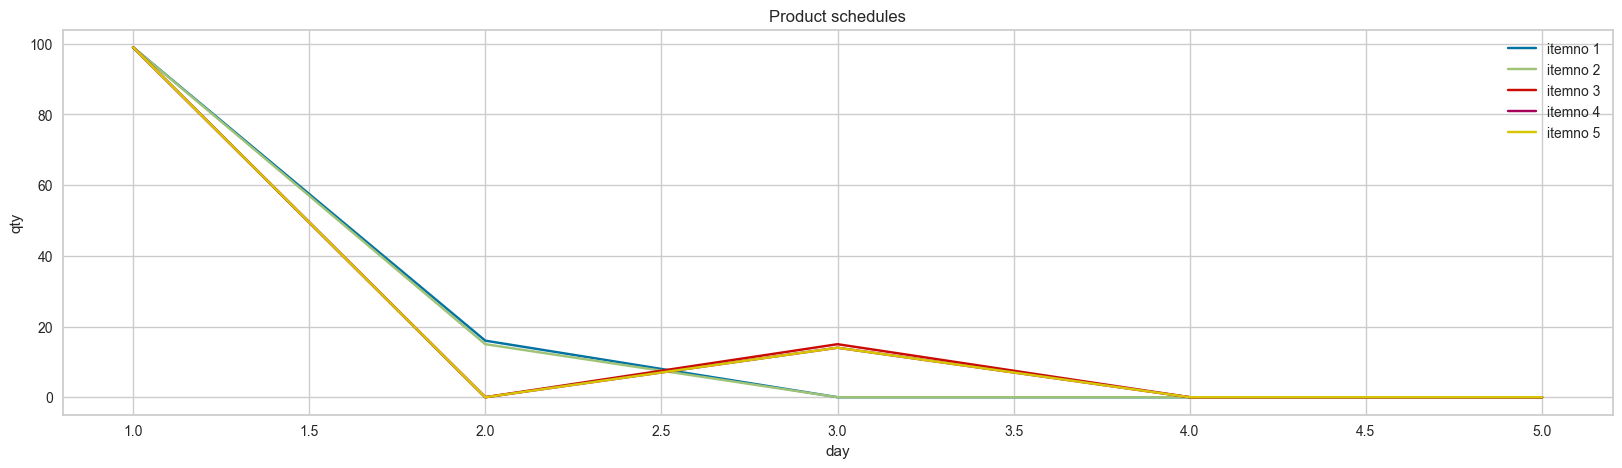

In [79]:
from cProfile import label
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 5))
plt.title('Product schedules')

for i in list(demand.keys()):
    df_result = plot_df[plot_df['itemno'] == i]
    plt.xlabel('day')
    plt.ylabel('qty')
    plt.plot(df_result['day'], df_result['qty'], label=f'itemno {i}')

plt.legend()
plt.show()


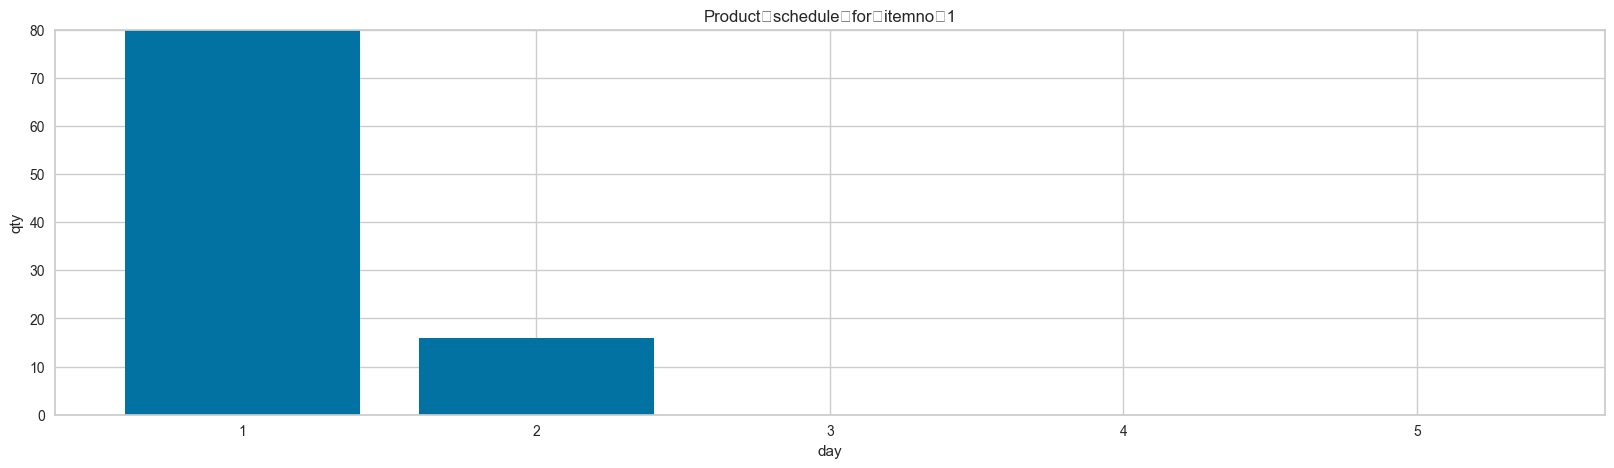

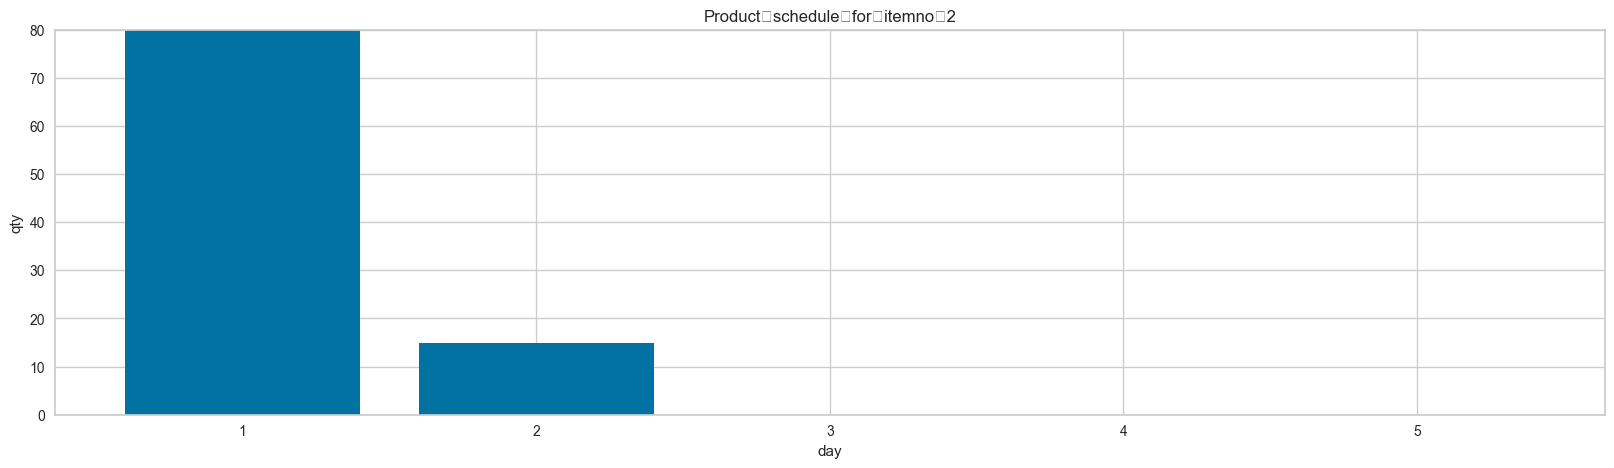

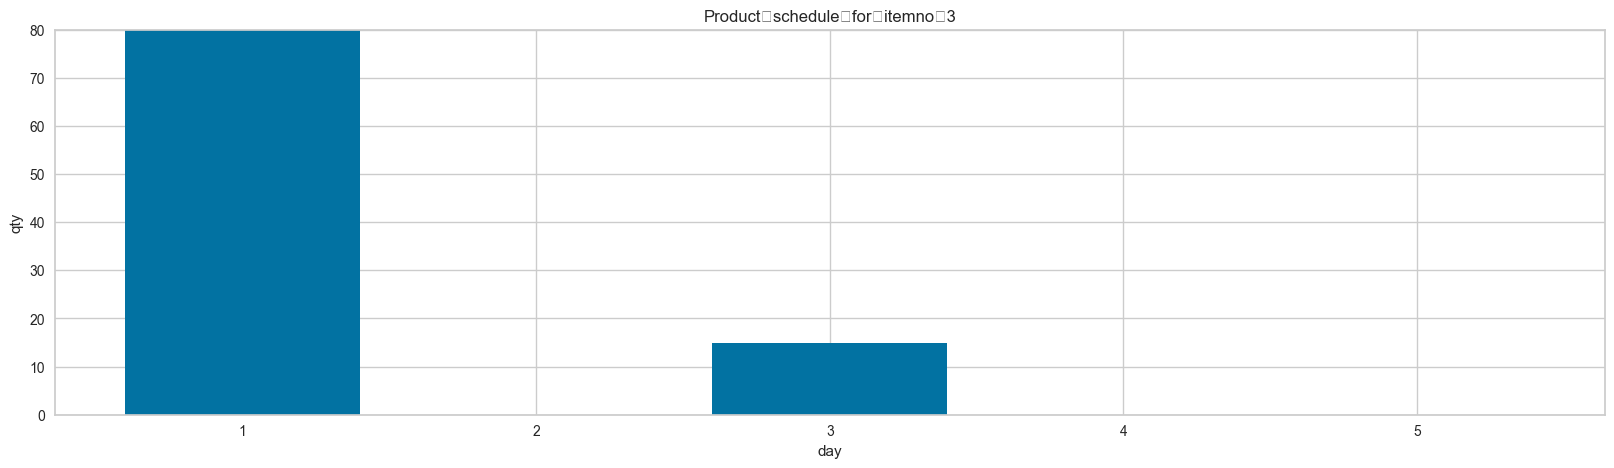

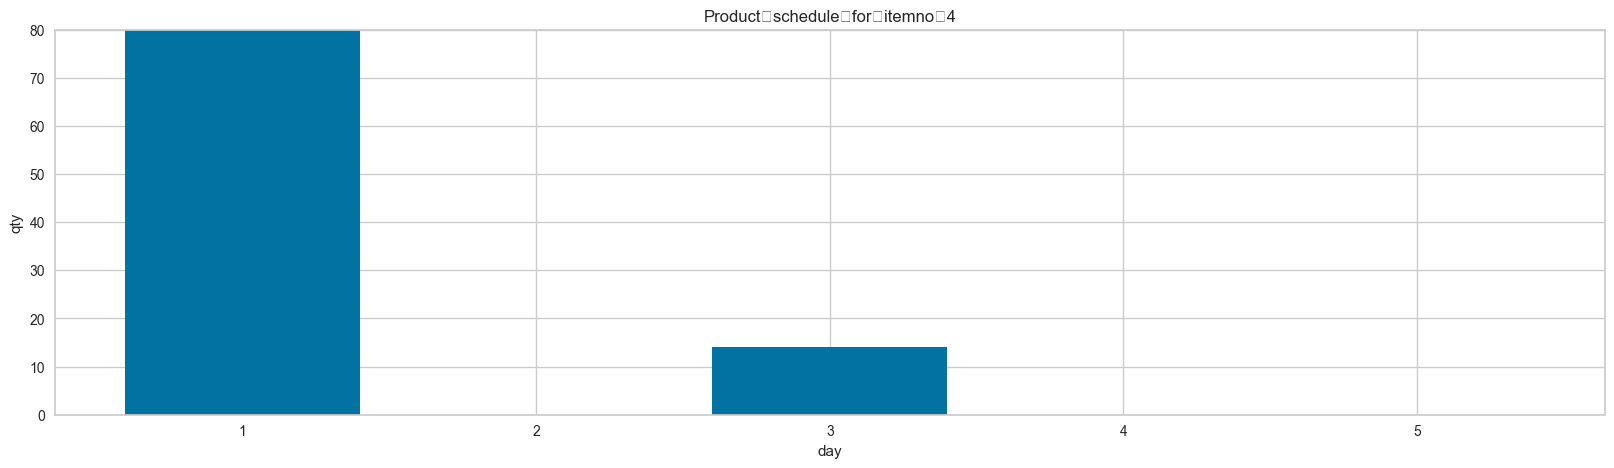

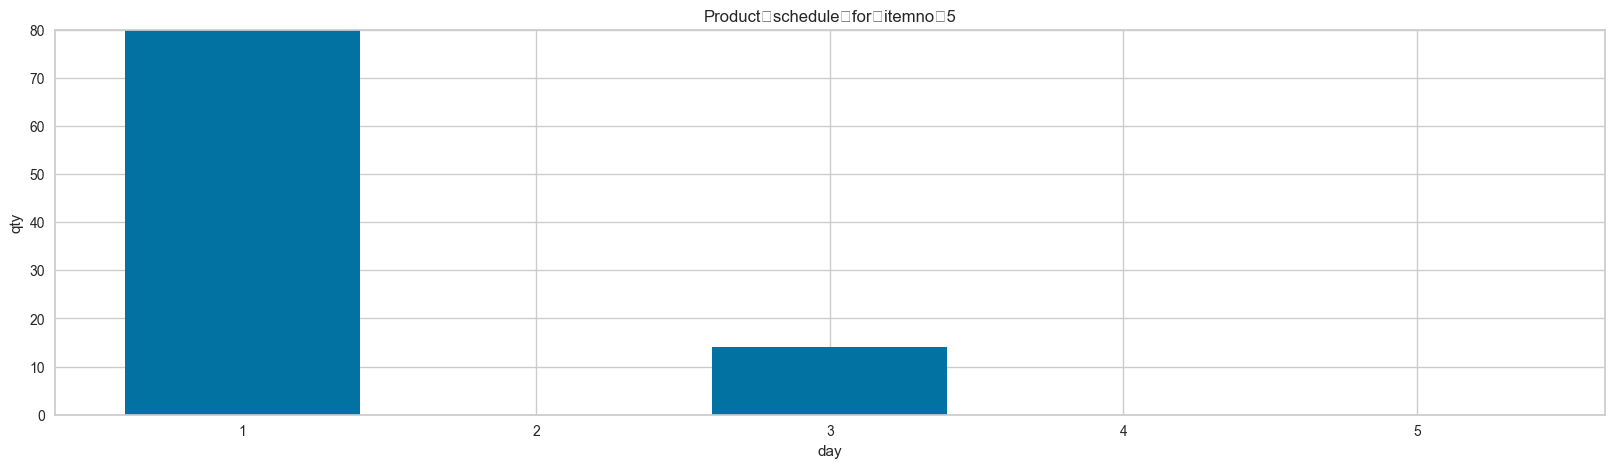

In [80]:
for	i	in	list(demand.keys()):
    df_result	=	plot_df[plot_df['itemno']==i]
    plt.figure(figsize=(20,	5))
    plt.xlabel('day')
    plt.ylabel('qty')
    plt.title(f'Product	schedule	for	itemno	{i}')
    plt.bar(df_result['day'],	df_result['qty'])
    plt.ylim(ymin=0,	ymax=80)
    plt.show()

In [81]:
# 하루에 균일하게 만드는 경우
total_current_not_opt = 0

for i in list(demand.keys()):
    for m in M:
        total_current_not_opt += ciqm[1, 20, m]

total_current_not_opt = total_current_not_opt * 5
save_current = total_current_not_opt - model.objective_value

print(f'최적화 하지 않은 생산 계획의 전류량: {round(total_current_not_opt, 2)} [A]')
print(f'자원 최적화 생산 계획의 전류량: {round(model.objective_value, 2)} [A]')
print(f'전류 감축량: {round(save_current, 2)} [A]')
print(f'전류 감축비율: {round(save_current / total_current_not_opt, 2) * 100}%')

최적화 하지 않은 생산 계획의 전류량: 196.61 [A]
자원 최적화 생산 계획의 전류량: 61.29 [A]
전류 감축량: 135.32 [A]
전류 감축비율: 69.0%


품질지수 검증